<a href="https://colab.research.google.com/github/Ayan2109/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing necessary Libraries**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# **Reading the csv file provided as a Dataframe** 

In [2]:
File = "https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV"
df= pd.read_csv(File)
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Understanding the shape of the data i.e number of rows X number of columns**

In [3]:
df.shape

(6362620, 11)

**Checking for any NULL values in the dataset**

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Checking the type of values the dataset has** 

In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# **Analyzing and Cleaning the dataset for the machine learning model**

**Visualizing the target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


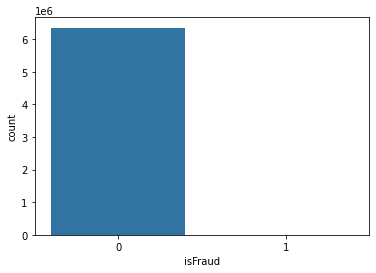

0    6354407
1       8213
Name: isFraud, dtype: int64


In [7]:
g = sns.countplot(df['isFraud'])
g.set_xticklabels(['0','1'])
plt.show()
print(df.isFraud.value_counts())

 **As we can see with the help of the countplot that number of values in the dataset that are not fraud is much higher than the values which are fraud indicating an imbalanced dataset**

Removing every Row which has nameDest starting M, as indicated in the data dict that we do not have information about it therefore they are not useful

In [8]:
# Dropping rows with namedest starting m because the data dict gave the info that we do not have information about transactions that are being done to customers name starting with M
df.drop(df[df['nameDest'].str.startswith('M') == True].index, inplace = True)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


In [9]:
#shape after removing the rows which nameDest that starts with M
df.shape

(4211125, 11)

Checking for any duplicate rows

In [10]:
#Checking for any Duplicate Rows
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]


0

Dropping columns nameOrig and nameDest because they are of object data type as seen above and they have any role as predictors, they are just identities

In [11]:
df.drop(df[['nameOrig']], axis = 1, inplace = True)
df.drop(df[['nameDest']], axis = 1, inplace = True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1,0
9,1,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,4465.0,0.00,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,15325.0,0.00,5083.0,51513.44,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


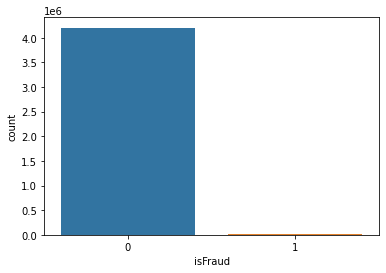

0    4202912
1       8213
Name: isFraud, dtype: int64

In [12]:
#visualizing the target variable after dropping rows and columns which are not required
g = sns.countplot(df['isFraud'])
g.set_xticklabels(['0','1'])
plt.show()
df.isFraud.value_counts()

The difference between fraud and not fraud values after dropping rows and columns is still very high indicating an imbalanced dataset

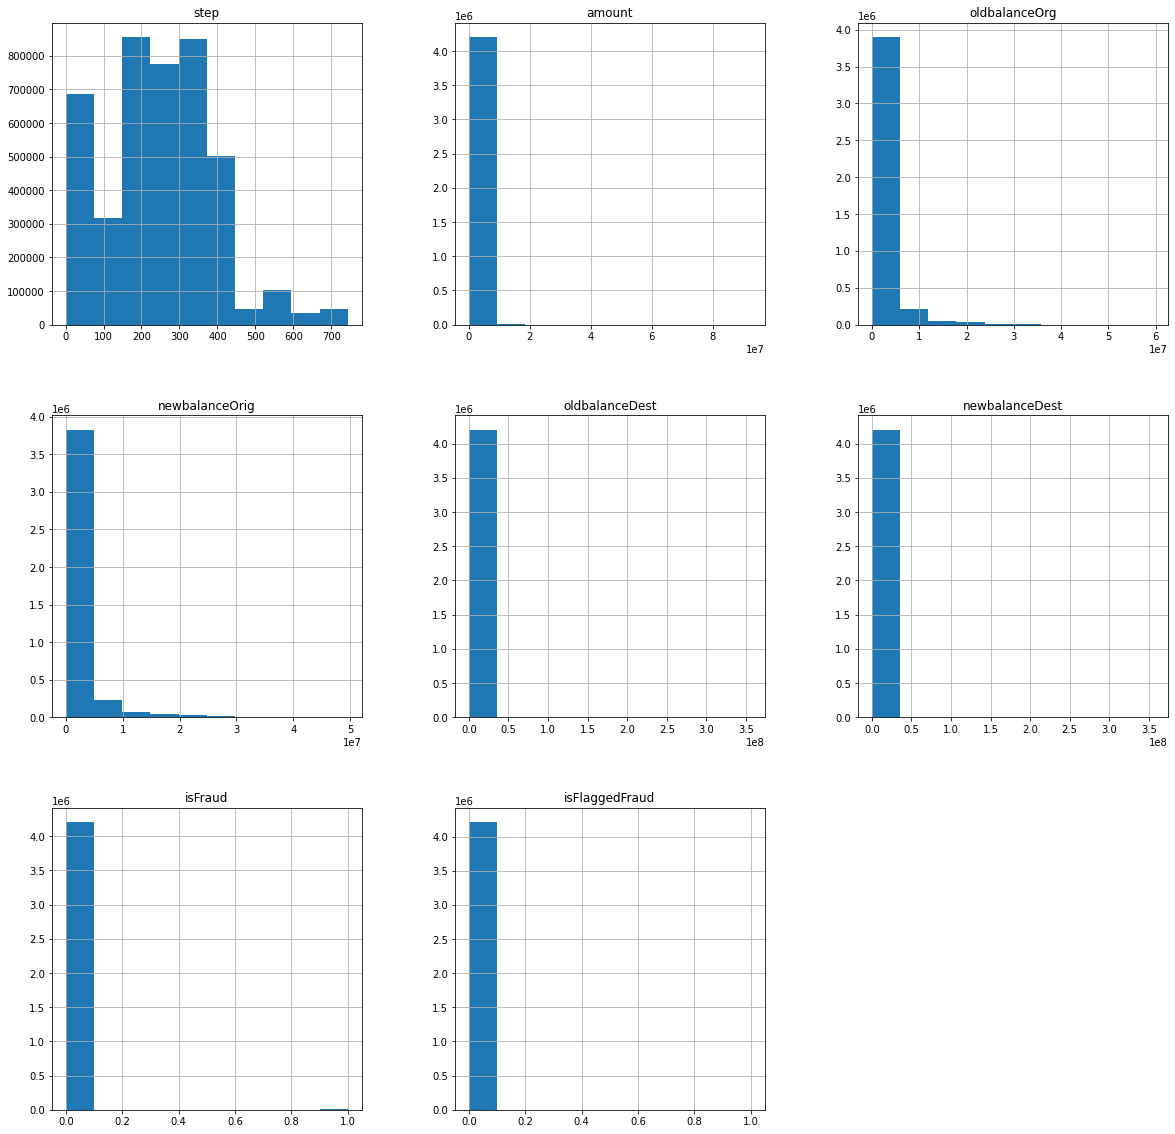

In [13]:
# histogram of every Parameter in the data
df.hist(figsize=(20,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


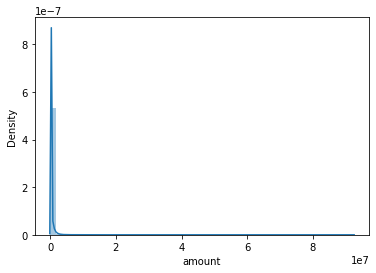

In [14]:
#plotting a distribution graph to interpret the most amount of money used in transaction
sns.distplot(df.amount)

 **Scatterplot to interpret the relationship between amount and the target variable 'isFraud'**

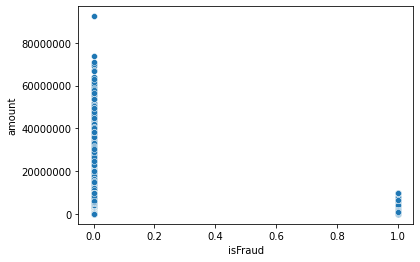

In [15]:
sns.scatterplot(data = df, x ='isFraud', y = 'amount')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see from the graph the amount that is mostly being used as transactions for not fraud

**Creating a Confusion Matrix to find any correlation between the predictor variables**

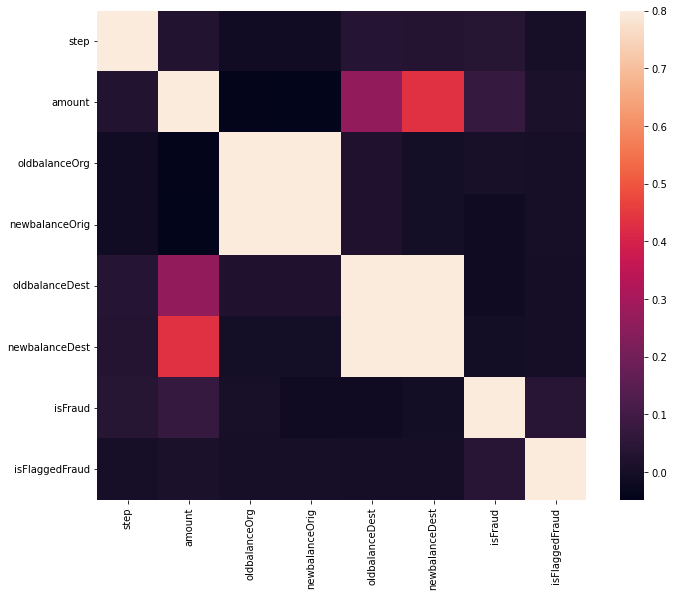

In [16]:
#correlation matrix
cormat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(cormat, vmax = 0.8, square=True)
plt.show()

As we can see with the help of the correlation matrix that the values newbalanceOrig and oldbalanceOrg are highly correlated, therefore we will be removing one of the respective columns on the basis of variance inflation factor, and similarly with newBalanceDest with oldbalanceDest

In [17]:
# We will be label encoding the type column with numerical value
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
label_type = le.fit_transform(df['type'])
print(label_type)


[3 1 2 ... 1 3 1]


In [18]:
# Dropping the Type column 
df.drop(df[['type']], axis = 1, inplace = True)

# creating a new type column with label encoded numerical value
df['type'] = label_type
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
2,1,181.00,181.0,0.00,0.0,0.00,1,0,3
3,1,181.00,181.0,0.00,21182.0,0.00,1,0,1
9,1,5337.77,41720.0,36382.23,41898.0,40348.79,0,0,2
10,1,9644.94,4465.0,0.00,10845.0,157982.12,0,0,2
15,1,229133.94,15325.0,0.00,5083.0,51513.44,0,0,1


In [19]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
def calcvif(x):
  vif_info = pd.DataFrame()

  vif_info['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  vif_info['Column'] = x.columns
  vif_info.sort_values('VIF', ascending=False)
  print(vif_info)


In [21]:
calcvif(df)

          VIF          Column
0    2.058734            step
1    4.196957          amount
2  582.971516   oldbalanceOrg
3  589.060518  newbalanceOrig
4   73.544661  oldbalanceDest
5   85.213485  newbalanceDest
6    1.198679         isFraud
7    1.002579  isFlaggedFraud
8    2.052955            type


In [22]:
#Dropping with Columns with High ViF and checking if VIF reduces for other columns
df.drop(df[['newbalanceOrig']], axis = 1 , inplace = True)

calcvif(df)

         VIF          Column
0   1.939786            step
1   4.153517          amount
2   1.169746   oldbalanceOrg
3  71.984246  oldbalanceDest
4  83.590079  newbalanceDest
5   1.016897         isFraud
6   1.002327  isFlaggedFraud
7   1.923518            type


In [23]:
# Dropping newbalanceDest Column to check if vif reduces for anyother columns
df.drop(df[['newbalanceDest']], axis = 1 , inplace = True)
calcvif(df)

        VIF          Column
0  1.884368            step
1  1.328038          amount
2  1.150740   oldbalanceOrg
3  1.242267  oldbalanceDest
4  1.011999         isFraud
5  1.002051  isFlaggedFraud
6  1.906396            type


As we can see that every VIF score is below 5 
Hence we can send our data for preprocessing

# **Preprocessing the Data**

In [24]:
#Creating the data sets X and Y data set for our predictor and target value
X = df.drop(labels = 'isFraud', axis = 1)
Y = df[['isFraud']]
print('Shape of the X Dataset (independent Variables): {}'.format(X.shape))
print('Shape of the Y Dataset (target value): {}'.format(Y.shape))

Shape of the X Dataset (independent Variables): (4211125, 6)
Shape of the Y Dataset (target value): (4211125, 1)


In [25]:
# Normalizing The Dataset X
X = StandardScaler().fit(X).transform(X)
##displaying the first 5 Values of normalized dataset
X[0:5]

array([[-1.70177386e+00, -3.64082530e-01, -3.51678026e-01,
        -4.09138628e-01, -1.94922400e-03,  2.25314973e+00],
       [-1.70177386e+00, -3.64082530e-01, -3.51678026e-01,
        -4.03927521e-01, -1.94922400e-03,  7.55077903e-02],
       [-1.70177386e+00, -3.56995054e-01, -3.39751737e-01,
        -3.98831058e-01, -1.94922400e-03,  1.16432876e+00],
       [-1.70177386e+00, -3.51075270e-01, -3.50448044e-01,
        -4.06470587e-01, -1.94922400e-03,  1.16432876e+00],
       [-1.70177386e+00, -4.94090969e-02, -3.47330023e-01,
        -4.07888130e-01, -1.94922400e-03,  7.55077903e-02]])

Creating the train Test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size = 0.3 , random_state = 4)

## **We will be Under Sampling and Over Sampling the respective Data to fix the imbalanced Dataset**

# **Training the model**

##Over Sampling the data set, to bring minority class equal to the majority class

In [27]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_over, Y_over = oversample.fit_resample(X_train,Y_train)
Y_over.value_counts()

isFraud
0          2941980
1          2941980
dtype: int64

In [28]:
#printing train and test shape size
print("Training set shape : {}        Test Set shape: {}".format(X_over.shape, X_test.shape))
print("Target value Training set shape: {}     Target value Testing set shape: {}".format(Y_over.shape,Y_test.shape))

Training set shape : (5883960, 6)        Test Set shape: (1263338, 6)
Target value Training set shape: (5883960, 1)     Target value Testing set shape: (1263338, 1)


### Creating Logistic Regression model for Over Sampled data and finding out the respective Accuracy Score, Jaccard Score, F1-Score, Log Loss and the confusion matrix

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C= 0.01 , solver = 'liblinear').fit(X_over,Y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [31]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,confusion_matrix,jaccard_score
acc_score_lr_over = accuracy_score(Y_test,yhat)
jaccard_score_lr_over = jaccard_score(Y_test,yhat)
f1_score_lr_over = f1_score(Y_test,yhat)
log_loss_lr_over = log_loss(Y_test,yhat_prob)

In [32]:

print("Accuracy Score for the ML model (over sampled) :- {:.4f}".format(acc_score_lr_over))
print("jaccard Score for the ML model (over sampled) :- {:.4f}".format(jaccard_score_lr_over))
print("F1-score for the Ml Model (over sampled):- {:.4f}".format(f1_score_lr_over ))
print("Log Loss for the Ml Model (over sampled):- {:.4f}".format(log_loss_lr_over))

Accuracy Score for the ML model (over sampled) :- 0.8579
jaccard Score for the ML model (over sampled) :- 0.0104
F1-score for the Ml Model (over sampled):- 0.0205
Log Loss for the Ml Model (over sampled):- 0.4496


array([[1081971,  178961],
       [    526,    1880]])

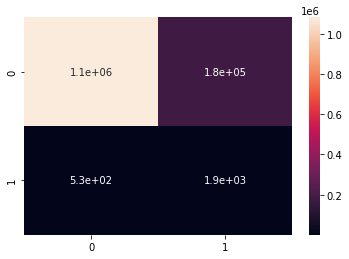

In [33]:
cf_matrix = confusion_matrix(Y_test,yhat)
sns.heatmap(cf_matrix, annot= True)
cf_matrix

### Creating Random Forest Classifier model for Over Sampled data and finding out the respective Accuracy score, Jaccard Score, F1-Score

In [34]:
# randomforestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10).fit(X_over,Y_over)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
yhat_rfc = rfc.predict(X_test)

In [36]:
acc_score_rfc_over = accuracy_score(Y_test,yhat_rfc)
jaccard_score_rfc_over = jaccard_score(Y_test,yhat_rfc)
f1_score_rfc_over = f1_score(Y_test,yhat_rfc)

In [37]:
print("Accuracy Score for the ML model (over sampled) :- {:.4f}".format(acc_score_rfc_over))
print("jaccard Score for the ML model (over sampled):- {:.4f}".format(jaccard_score_rfc_over))
print("F1-score for the Ml Model (over sampled):- {:.4f}".format(f1_score_rfc_over ))

Accuracy Score for the ML model (over sampled) :- 0.9994
jaccard Score for the ML model (over sampled):- 0.6838
F1-score for the Ml Model (over sampled):- 0.8122


##Under Sampling the data set, to bring majority class equal to the minority class

In [38]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 0.5)
X_under, Y_under = undersample.fit_resample(X_train,Y_train)
Y_under.value_counts()

isFraud
0          11614
1           5807
dtype: int64

In [39]:
#print train and test shape size
print("Training set shape : {}        Test Set shape: {}".format(X_under.shape, X_test.shape))
print("Target value Training set shape: {}     Target value Testing set shape: {}".format(Y_under.shape,Y_test.shape))

Training set shape : (17421, 6)        Test Set shape: (1263338, 6)
Target value Training set shape: (17421, 1)     Target value Testing set shape: (1263338, 1)


### Creating Logistic Regression model for Under Sampled data and finding out the respective Accuracy score, Jaccard Score, F1-Score, Log Loss and the confusion matrix

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C= 0.01 , solver = 'liblinear').fit(X_under,Y_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [42]:
acc_score_lr_under = accuracy_score(Y_test,yhat)
jaccard_score_lr_under = jaccard_score(Y_test,yhat)
f1_score_lr_under = f1_score(Y_test,yhat)
log_loss_lr_under = log_loss(Y_test,yhat_prob)

In [43]:

print("Accuracy Score for the ML model (under sampled) :- {:.4f}".format(acc_score_lr_under))
print("jaccard Score for the ML model (under sampled):- {:.4f}".format(jaccard_score_lr_under))
print("F1-score for the Ml Model (under sampled):- {:.4f}".format(f1_score_lr_under))
print("Log Loss for the Ml Model (under sampled):- {:.4f}".format(log_loss_lr_under))

Accuracy Score for the ML model (under sampled) :- 0.9115
jaccard Score for the ML model (under sampled):- 0.0134
F1-score for the Ml Model (under sampled):- 0.0265
Log Loss for the Ml Model (under sampled):- 0.2864


array([[1150031,  110901],
       [    887,    1519]])

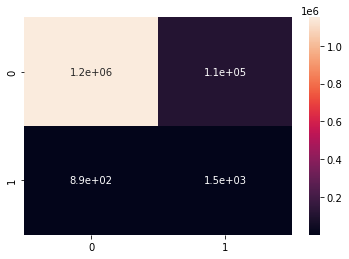

In [44]:
cf_matrix = confusion_matrix(Y_test,yhat)
sns.heatmap(cf_matrix, annot= True)
cf_matrix

### Creating Random Forest Classifier model for Under Sampled data and finding out the respective Accuracy score,Jaccard Score, F1-Score

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10).fit(X_under,Y_under)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [46]:
yhat_rfc = rfc.predict(X_test)

In [47]:
acc_score_rfc_under = accuracy_score(Y_test,yhat_rfc)
jaccard_score_rfc_under = jaccard_score(Y_test,yhat_rfc)
f1_score_rfc_under = f1_score(Y_test,yhat_rfc)

In [48]:
print("Accuracy Score for the ML model (under sampled):- {:.4f}".format(acc_score_rfc_under))
print("jaccard Score for the ML model (under sampled) :- {:.4f}".format(jaccard_score(Y_test,yhat_rfc)))
print("F1-score for the Ml Model (under sampled):- {:.4f}".format(f1_score_rfc_under))

Accuracy Score for the ML model (under sampled):- 0.9855
jaccard Score for the ML model (under sampled) :- 0.1112
F1-score for the Ml Model (under sampled):- 0.2001


#**Final result**

Comparing all the metric values for both the model according to Over Sampled and Under Sampled data

In [49]:
#LR -> logisitic Regression  RFC -> Random Forest Classifier
data = {'MethodToBalanceData' : ['OverSampling','UnderSampling'],
        'AccuracyScore_LR' : [acc_score_lr_over,acc_score_lr_under],
        'JaccardScore_LR' : [jaccard_score_lr_over,jaccard_score_lr_under],
        'F1-Score_LR' : [f1_score_lr_over,f1_score_lr_under],
        'LogLoss_LR' : [log_loss_lr_over,log_loss_lr_under],
        'AccuracyScore_RFC' : [acc_score_rfc_over,acc_score_rfc_under],
        'JaccardScore_RFC' : [jaccard_score_rfc_over,jaccard_score_rfc_under],
        'F1-Score_RFC' : [f1_score_rfc_over,f1_score_rfc_under]
        }

evaluation_df = pd.DataFrame(data, columns = ['MethodToBalanceData','AccuracyScore_LR','JaccardScore_LR','F1-Score_LR','LogLoss_LR','AccuracyScore_RFC','JaccardScore_RFC','F1-Score_RFC'])

evaluation_df

,MethodToBalanceData,AccuracyScore_LR,JaccardScore_LR,F1-Score_LR,LogLoss_LR,AccuracyScore_RFC,JaccardScore_RFC,F1-Score_RFC
0,OverSampling,0.857926,0.010366,0.020519,0.449623,0.999351,0.683764,0.812185
1,UnderSampling,0.911514,0.013406,0.026457,0.286442,0.985483,0.111176,0.200105
